In [45]:
import pandas as pd
import numpy as np

import librosa
import librosa.display
import IPython.display as ipd

import matplotlib.pyplot as plt
%matplotlib inline

import time
import scipy
import scipy.signal as signal

## Exercício 1

In [22]:
def plot_signal(t, x):
    fig, ax = plt.subplots()
    ax.plot(t, x)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Amplitude')
    
def plot_spectrogram(fs, x):
    hop_length = 64
    n_fft = 128
    n_window = 128

    X = librosa.stft(x, win_length = n_window, n_fft = n_fft, hop_length = hop_length, window = 'hamming')
    D = librosa.amplitude_to_db(np.abs(X), ref=np.max)

    librosa.display.specshow(D, y_axis = 'linear', x_axis='time', sr = fs, hop_length=hop_length, vmin=-50, vmax=0) # , cmap='gray_r'
    plt.colorbar(format='%+2.0f dB')
    plt.title('Linear-frequency power spectrogram')

In [23]:
fs = 5000 # > 2 * frequência do sinal

a) Temos energia em uma única faixa de frequência (f = 1000 Hz)

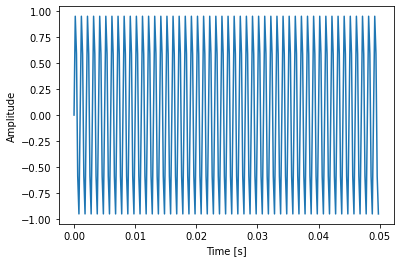

In [24]:
t = np.arange(0.0, 0.050, 1/fs)
f = 1000
x = np.sin(2 * np.pi * f * t)
plot_signal(t, x)

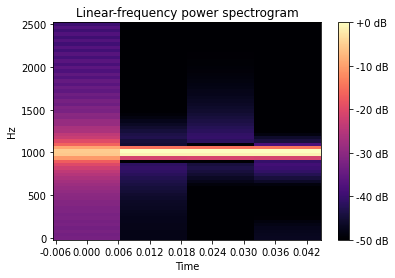

In [25]:
plot_spectrogram(fs, x)

b) Temos energia em duas faixas de frequência (f1 = 500 Hz, f2 = 1000 Hz)

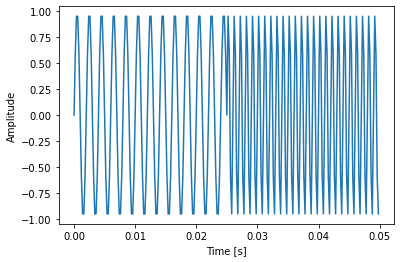

In [26]:
t1 = np.arange(0.000, 0.025, 1/fs)
f1 = 500
x1 = np.sin(2 * np.pi * f1 * t1)

t2 = np.arange(0.025, 0.050, 1/fs)
f2 = 1000
x2 = np.sin(2 * np.pi * f2 * t2)

t = np.hstack([t1, t2])
x = np.hstack([x1, x2])

plot_signal(t, x)

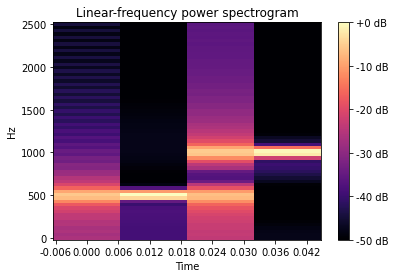

In [27]:
plot_spectrogram(fs, x)

c) Temos energia em duas faixas de frequência, separadas por uma faixa sem energia (f1 = 1000 Hz, f2 = 0 Hz, f3 = 500 Hz)

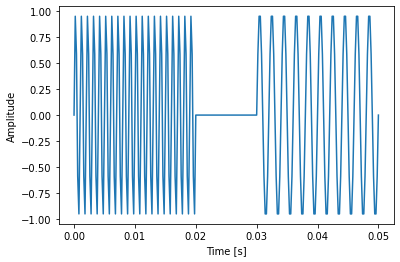

In [28]:
t1 = np.arange(0.000, 0.020, 1/fs)
f1 = 1000
x1 = np.sin(2 * np.pi * f1 * t1)

t2 = np.arange(0.020, 0.030, 1/fs)
x2 = np.zeros(len(t2))

t3 = np.arange(0.030, 0.050, 1/fs)
f3 = 500
x3 = np.sin(2 * np.pi * f3 * t3)

t = np.hstack([t1, t2, t3])
x = np.hstack([x1, x2, x3])

plot_signal(t, x)

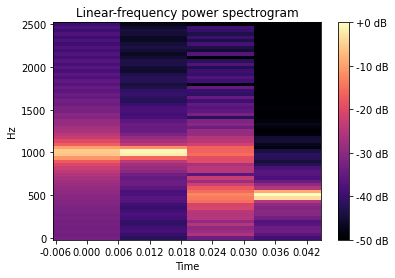

In [29]:
plot_spectrogram(fs, x)

d) Temos energia em uma faixa de frequência crescendo linearmente no tempo: $f(t) = a * t$, em que $a = 2000 / 0.05 = 400$

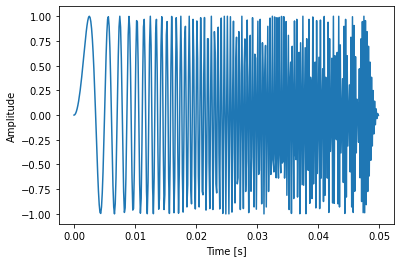

In [30]:
t = np.arange(0.0, 0.050, 1/8000)
x = np.array([])
for n in t:
    f = 2000 / 0.050 * n
    #print("{} s => {} Hz".format(n, f))
    x_n = np.sin(2 * np.pi * f * n)
    x = np.hstack([x, x_n])
plot_signal(t, x)

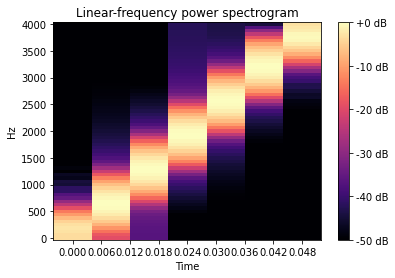

In [31]:
plot_spectrogram(8000, x)

e) Temos energia em uma faixa de frequência crescendo exponencialmente no tempo: $f(t) = a*exp(bt)$, em que $a = 1$ (pois em $t = 0$ temos $f(t=0) = 1 Hz$) e $b = ln(2000)/5$ (pois em $t=5 s$ temos $f = 2000 Hz$). Adicionamos um fator de $1 / 0.01$ para facilitar a visualização.

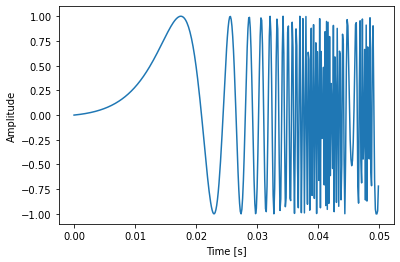

In [32]:
t = np.arange(0.0, 0.050, 1/8000)
x = np.array([])
for n in t:
    f = np.exp(np.log(2000) / 5 * n / 0.01)
    #print("{} s => {} Hz".format(n, f))
    x_n = np.sin(2 * np.pi * f * n)
    x = np.hstack([x, x_n])
plot_signal(t, x)

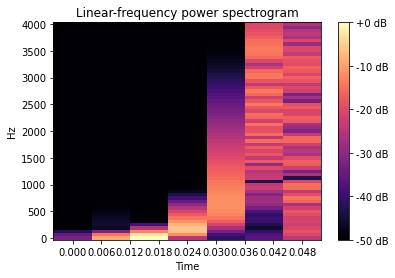

In [33]:
plot_spectrogram(8000, x)

f) Temos energia em várias faixas de frequência (f1 = 450 Hz, f2 = 875 Hz, f3 = 1300 Hz, f4 = 1750 Hz)

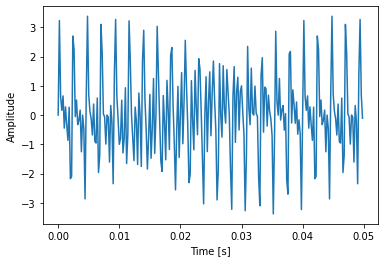

In [34]:
t = np.arange(0.000, 0.050, 1/fs)

f1 = 450
x1 = np.sin(2 * np.pi * f1 * t)

f2 = 875
x2 = np.sin(2 * np.pi * f2 * t)

f3 = 1300
x3 = np.sin(2 * np.pi * f3 * t)

f4 = 1750
x4 = np.sin(2 * np.pi * f4 * t)

x = np.sum([x1, x2, x3, x4], axis=0)

plot_signal(t, x)

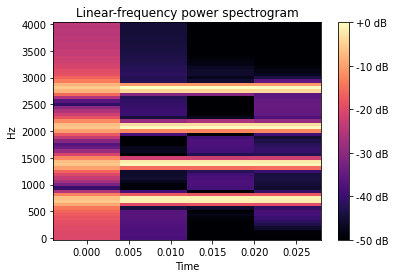

In [35]:
plot_spectrogram(8000, x)

## Exercício 2

a) A frequência máxima apresentada no espectrograma é $f_{max} = 4 kHz$. Logo, segundo o teorema de Nyquist, a frequência de amostragem precisa ser $f_s \geq 2 f_{max}$, ou seja, $f_s = 8 kHz$.

b) A resolução em frequência é $f_{res} = 10 Hz$. Logo, a quantidade de pontos para cálculo da FFT é $N = f_{s} / f_{res} = 8 kHz / 10 Hz$, ou seja, $N = 800$ amostras. Como estamos considerando o tamanho da janela igual à quantidade de amostras utilizadas para a FFT, então temos que o tamanho da janela é de 800 amostras.

c) A resolução temporal é $t_{res} = 0.05 s = 50 ms$. Portanto, o tamanho do _hop_ é a quantidade de pontos que cabem dentro do espaço de tempo de 50 ms. Ao multiplicarmos pela frequência de amostragem, temos a quantidade de amostras dentro do _hop_: $t_{res} * f_{s} = 0.05 s * 8 kHz = 400$ amostras.

Obs.: Como usamos 800 pontos para o cálculo da FFT e temos um _hop size_ de 400 amostras, temos um _overlap_ de 400 amostras.

## Exercício 3

<img src="images/sons_vozeados_nao_vozeados.png" />

## Exercício 4

In [60]:
def segment_signal(x, length, hop):
    segments = []
    for i in range(0, len(x), hop):
        segment = x[i:i+hop]
        segments.append(segment)
    return segments

In [43]:
x, sr = librosa.load("./audios/profissao_aeromoca.wav", sr = 16000, mono = True)

In [46]:
ipd.Audio(x, rate=sr)

In [47]:
x

array([ 0.00033569,  0.00073242,  0.00216675, ..., -0.00262451,
       -0.00564575, -0.00628662], dtype=float32)

In [50]:
len(x)

68326

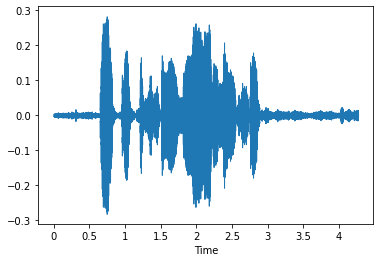

In [48]:
librosa.display.waveshow(x, sr=sr)

In [49]:
1/16000

6.25e-05

$f_{s} = 16 kHz$, ou seja, 16.000 amostras por segundo, 0,00625 s por amostra.

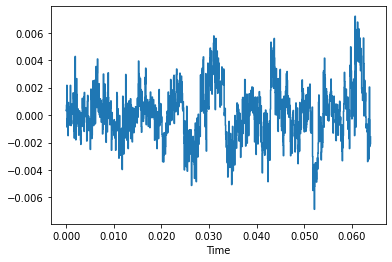

In [51]:
librosa.display.waveshow(x[0:1024], sr=sr)

In [61]:
x_segments = segment_signal(x, length=1024, hop=512)

In [63]:
len(x_segments)

134